In [1]:
# In[132]:
from IPython import get_ipython 
get_ipython().magic(u'matplotlib inline')
get_ipython().run_line_magic('matplotlib', 'inline')

# 
# # Diagnóstico Cancer de Mama usando uma Rede Neural MLP
# 
# Este é um exemplo do uso da biblioteca scikit-learn para treinar uma rede neural MLP e classificar pacientes 
# com tumores malignos ou benignos.
# 
# A base possui a seguinte distribuição:
# 
# - 212 pacientes da classe MALIGNO
# - 357 pacientes da classe BENINGNO
# 
# São 569 pacientes ao todo e 30 atributos descrevendo as características de cada paciente.

In [2]:
# In[133]:

print(__doc__)

# Importando matplotlib 
# O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays
import matplotlib.pyplot as plt 

# Importando conjunto de dados, classificadores e métricas de desempenho
# sklearn : aprendizado de máquina
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#numpy: processamento de vetores multidimensionais
# panda: análise e manipulação dos dados
import numpy as np
import pandas as pd


# ## Base de Dados de Cancer
# 
# Vamos listas os nomes dos 30 atributos da base:

Automatically created module for IPython interactive environment


In [3]:
# In[134]:
#carrega conjunto de dados de cancer
#features: funcionalidades 
#labels:rotulos

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

features = data.data
labels = data.target

num_features = features.shape[1]

print("Atributos: ", data.feature_names)
print(" ")
print("Classes: ", data.target_names)

# # Analisando Atributos (Histograma)

# 'raio médio' 'textura média' 'perímetro médio' 'área média'
# 'significa suavidade' 'significa compactação' 'significa concavidade'
#'significa pontos côncavos' 'significa simetria' 'significa dimensão fractal'
# 'erro de raio' 'erro de textura' 'erro de perímetro' 'erro de área'
# 'erro de suavidade' 'erro de compactação' 'erro de concavidade'
# 'erro de pontos côncavos' 'erro de simetria' 'erro de dimensão fractal'
# 'pior raio' 'pior textura' 'pior perímetro' 'pior área'
# 'pior suavidade' 'pior compactação' 'pior concavidade'
# 'piores pontos côncavos' 'pior simetria' 'pior dimensão fractal'

Atributos:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
 
Classes:  ['malignant' 'benign']


C:\Users\Samsung\AppData\Local\Temp/ipykernel_8952/3335553475.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  x = data.data.hist(ax = ax)


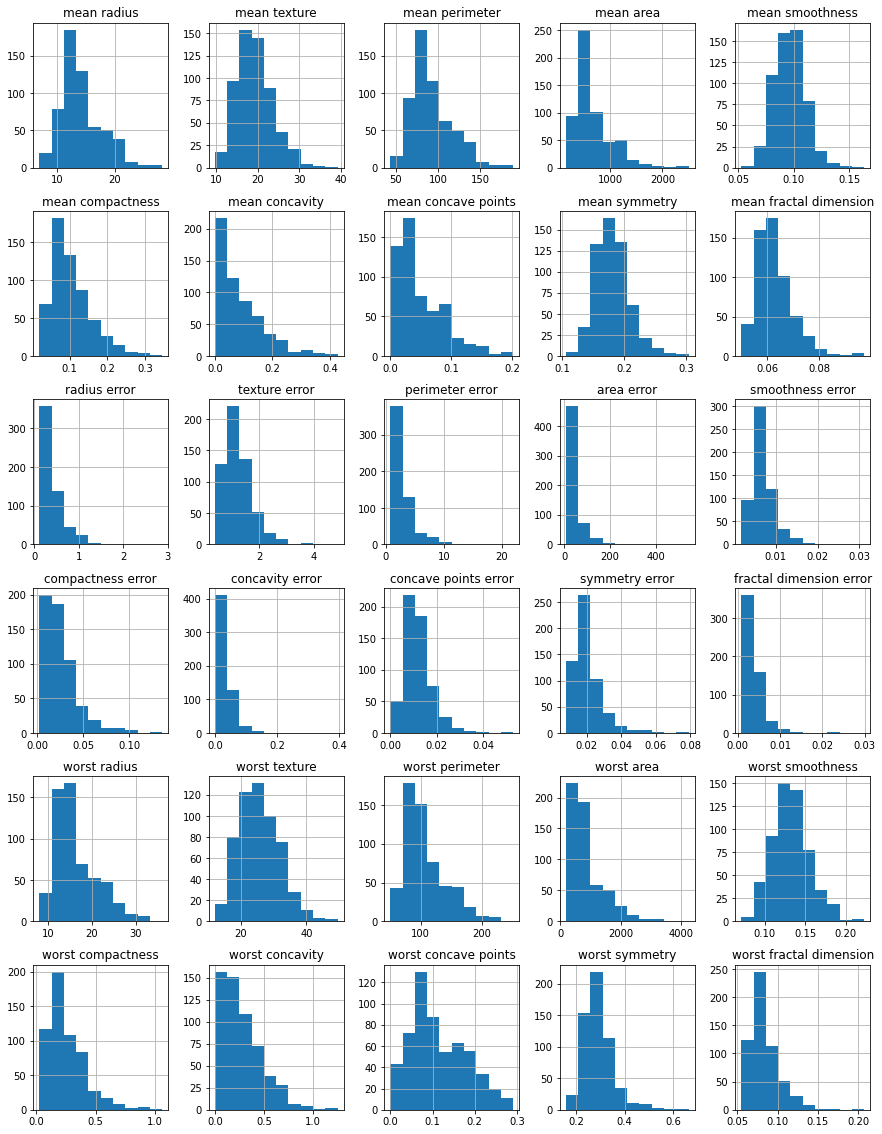

In [4]:
# In[135]:
#tamanho da figura
#gca: "obter eixos atuais"
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
x = data.data.hist(ax = ax)

# # Treinando o Modelo de Classificação
# 
# Agora criamos a rede MLP com a estrutura desejada e definimos seus hiperparâmetros de treinamento.
# Estes parâmetros são importantes pois irão definir a qualidade do resultado.
# 
# Podemos dividir os dados em subconjuntos de treinamento e teste e ajustar uma rede neural MLP 
# (Multilayer Perceptron). 
# O classificador após o ajuste poderá ser usado para prever a classe das amostras do subconjunto de teste.
# 
#A rede MLP possui 30 unidades de entrada, um número de camadas ocultas e neurônios em cada camada oculta definido 
#pelo usuário e 1 neurônio na camada de saída.

In [5]:
#In[136]:


# Creando uma rede MLP
# Definindo a rede:

# hidden_layer_sizes: tupla, tamanho = n_camadas - 2, default=(100,)
# alpha: float, default=0.0001
# learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
# learning_rate_init: double, default=0.001
# max_iter: int, default=200
# early_stopping: bool, default=False
# tol: float, default=1e-4

clf = MLPClassifier(solver='lbfgs', alpha=0.0001, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100])

# Dividindo o conjundo de Dados
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, shuffle=False)

# Treinar o modelo com o conjunto de treinamento 
clf.fit(X_train, y_train)

# Prever a classe do dígito com o subconjunto de teste
predicted = clf.predict(X_test)

# # Testando o Classificador
# 
# Exibindo o relatório de classificação da rede MLP para o subconjunto de teste. 
# 

In [6]:
# In[137]:


print(f"Relatório de Classificação do {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

# # Matriz de Confusão do Classificador
# 
# Exibindo a matriz `confusion matrix <confusion_matrix>` dos valores reais e dos valores previstos. As linhas correspondem aos valores reais e as colunas aos valores previstos. A contagem de acertos em relação ao subconjunto dedados de teste mostrará na diagonal principal os acertos e nas demais posições os erros.
# 

Relatório de Classificação do MLPClassifier(early_stopping=True, hidden_layer_sizes=[100], max_iter=2000,
              random_state=1, solver='lbfgs'):
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        39
           1       0.98      0.89      0.94       132

    accuracy                           0.91       171
   macro avg       0.85      0.92      0.88       171
weighted avg       0.92      0.91      0.91       171




Matriz de Confusão:
[[ 37   2]
 [ 14 118]]


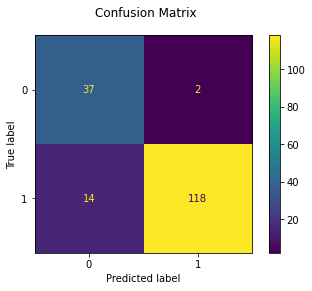

In [7]:
# In[138]:


disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")

plt.show()